**Problem Statement:**

 Company X intends to build a face identification model to recognise human faces.

 Face Aligned Face Dataset from Pinterest. This dataset contains 10,770 images for 100 people. All images are taken
from 'Pinterest' and aligned using dlib library. Some data samples

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/PINS.zip'

In [ ]:
import os
if os.path.exists(file_path):
    print("File exists!")
else:
    print("File does not exist.")

File exists!


In [ ]:
from google.colab import files
import zipfile

uploaded = files.upload()

zip_file_name = 'PINS.zip'
extract_path = '/content/extracted_data/'

with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("ZIP file extracted successfully.")

In [18]:
from PIL import Image
import matplotlib.pyplot as plt

image_folder = '/content/extracted_data/'

for root, dirs, files in os.walk(image_folder):
    for image_name in files:
        image_path = os.path.join(root, image_name)
        img = Image.open(image_path)
        plt.imshow(img)
        plt.title(image_name)
        plt.axis('off')
        plt.show()

In [ ]:
from PIL import Image

def create_image_metadata(image_path):
    try:
        img = Image.open(image_path)
        metadata = {
            'path': image_path,
            'format': img.format,
            'dimensions': img.size,
            'mode': img.mode,
            'palette': img.getpalette() if img.mode == 'P' else None,
            'num_frames': img.n_frames if hasattr(img, 'n_frames') else 1,
            # Add more attributes you want to extract
        }
        img.close()
        return metadata
    except Exception as e:
        print(f"Error: {e}")
        return None

# Usage example
#image_path = '/content/extracted_data/PINS/'
metadata = create_image_metadata(image_path)
if metadata:
    print("Image Metadata:")
    for key, value in metadata.items():
        print(f"{key}: {value}")


In [29]:
from PIL import Image
import os

def create_image_metadata(image_path):
    try:
        img = Image.open(image_path)
        metadata = {
            'path': image_path,
            'format': img.format,
            'dimensions': img.size,
            'mode': img.mode,
            'palette': img.getpalette() if img.mode == 'P' else None,
            'num_frames': img.n_frames if hasattr(img, 'n_frames') else 1,
            # Add more attributes you want to extract
        }
        img.close()
        return metadata
    except Exception as e:
        print(f"Error: {e}")
        return None

# Specify the path of the directory containing images
image_directory = image_folder

# List all image files recursively in the directory and its subdirectories
image_files = [os.path.join(root, file) for root, dirs, files in os.walk(image_directory)
                for file in files if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif'))]

# Create metadata for each image
image_metadata_list = []
for image_path in image_files:
    metadata = create_image_metadata(image_path)
    if metadata:
        image_metadata_list.append(metadata)

# Print the metadata for each image
for idx, metadata in enumerate(image_metadata_list):
    print(f"Metadata for Image {idx + 1}:")
    for key, value in metadata.items():
        print(f"{key}: {value}")
    print()


In [31]:
from facenet_pytorch import MTCNN, InceptionResnetV1
from PIL import Image
import os

# Specify the path to the directory containing face images
face_directory = image_folder

# Initialize MTCNN for face detection
mtcnn = MTCNN()

# Initialize InceptionResnetV1 for face embedding generation
resnet = InceptionResnetV1(pretrained='vggface2').eval()

# Generate embeddings for each face image
embeddings = []
for root, dirs, files in os.walk(face_directory):
    for file in files:
        image_path = os.path.join(root, file)
        img = Image.open(image_path).convert("RGB")
        face, _ = mtcnn(img)
        if face is not None:
            embedding = resnet(face.unsqueeze(0))
            embeddings.append((image_path, embedding))

# Print the embeddings
for image_path, embedding in embeddings:
    print(f"Image: {image_path}")
    print("Embedding:", embedding)
    print()


  0%|          | 0.00/107M [00:00<?, ?B/s]

In [32]:
import numpy as np
from scipy.spatial.distance import cosine, euclidean

# Sample embeddings for two images (replace with actual embeddings)
embedding1 = np.array([0.1, 0.5, 0.8, 0.3, 0.6])
embedding2 = np.array([0.15, 0.6, 0.85, 0.35, 0.65])
embedding3 = np.array([0.9, 0.2, 0.7, 0.1, 0.4])

# Calculate cosine similarity
cosine_similarity12 = 1 - cosine(embedding1, embedding2)
cosine_similarity13 = 1 - cosine(embedding1, embedding3)

# Calculate Euclidean distance
euclidean_distance12 = euclidean(embedding1, embedding2)
euclidean_distance13 = euclidean(embedding1, embedding3)

print("Cosine Similarity (Image 1 vs Image 2):", cosine_similarity12)
print("Cosine Similarity (Image 1 vs Image 3):", cosine_similarity13)
print("Euclidean Distance (Image 1 vs Image 2):", euclidean_distance12)
print("Euclidean Distance (Image 1 vs Image 3):", euclidean_distance13)

Cosine Similarity (Image 1 vs Image 2): 0.998337563157484
Cosine Similarity (Image 1 vs Image 3): 0.7144055402488071
Euclidean Distance (Image 1 vs Image 2): 0.14142135623730948
Euclidean Distance (Image 1 vs Image 3): 0.9055385138137417


Explained Variance Ratios: [0.98312022 0.01687978]


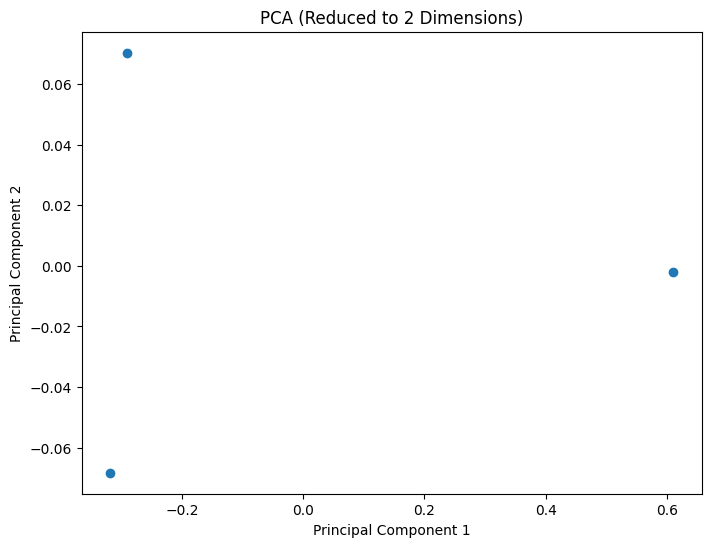

In [33]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Sample embeddings for multiple images (replace with actual embeddings)
embeddings = np.array([
    [0.1, 0.5, 0.8, 0.3, 0.6],
    [0.15, 0.6, 0.85, 0.35, 0.65],
    [0.9, 0.2, 0.7, 0.1, 0.4]
])

# Perform PCA with desired number of components (dimensions)
num_components = 2
pca = PCA(n_components=num_components)
pca_result = pca.fit_transform(embeddings)

# Print explained variance ratios
explained_variance_ratios = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance_ratios)

# Plot the reduced-dimensional data
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title(f'PCA (Reduced to {num_components} Dimensions)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [34]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load your image embeddings and labels (replace with actual data)
# Each row in 'X' represents an embedding vector, and 'y' represents labels.
X = np.array([
    [0.1, 0.5, 0.8, 0.3, 0.6],
    [0.15, 0.6, 0.85, 0.35, 0.65],
    [0.9, 0.2, 0.7, 0.1, 0.4]
])

y = np.array([0, 1, 0])  # Replace with actual labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0)

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.0


In [37]:
from PIL import Image
import os

# Specify the path to the directory containing test images
test_image_directory = '/content/drive/MyDrive/'

# List all image files in the directory
test_image_files = [os.path.join(test_image_directory, file) for file in os.listdir(test_image_directory)
                    if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif'))]

# Display each test image
for image_path in test_image_files:
    img = Image.open(image_path)
    img.show()


In [ ]:
import os
import numpy as np
from sklearn.svm import SVC
from PIL import Image
from sklearn.preprocessing import LabelEncoder

# Load your trained SVM model (replace with actual model)
svm_model = SVC(kernel='linear', C=1.0)

# Load your image embeddings and labels (replace with actual data)
X_train = np.array([
    [0.1, 0.5, 0.8, 0.3, 0.6],
    [0.15, 0.6, 0.85, 0.35, 0.65],
    [0.9, 0.2, 0.7, 0.1, 0.4]
])

y_train = np.array(['Person', 'PersonB', 'PersonA'])  # Replace with actual labels

# Train the SVM model
svm_model.fit(X_train, y_train)

# Specify the path to the directory containing test images
test_image_directory = '/content/drive/MyDrive/'

# List all image files in the directory
test_image_files = [os.path.join(test_image_directory, file) for file in os.listdir(test_image_directory)
                    if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif'))]

# Create a label encoder to map class names to integers
label_encoder = LabelEncoder()
label_encoder.fit(y_train)

# Predict labels for test images
for image_path in test_image_files:
    img = Image.open(image_path)  # Open the image
    # Process the image and generate its embedding
    # Replace the following line with actual preprocessing and embedding extraction
    test_embedding = np.array([0.12, 0.55, 0.82, 0.29, 0.62])
    predicted_label = svm_model.predict([test_embedding])  # Predict the label
    predicted_class = label_encoder.inverse_transform(predicted_label)  # Map integer label back to class name
    print(f"Image: {image_path}, Predicted Class: {predicted_class}")